In [2]:
import nptdms as tdms
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
import time

# transform tdms into csv

## DEMO single file
### voltage current

In [85]:
dir_file = "./电流电压/" 
filename = "Voltage-Current-2019-11-19T08-55-08"
suffix = ".tdms"
dir_save = "./voltage_current_csv/"
group_name = 'Voltage-Current'
file_read = dir_file+filename+suffix
file_save = dir_save+filename+".csv"

# read file
tdms_file = tdms.TdmsFile(file_read)
# transform tdms into dataframe
df = tdms_file.as_dataframe()
# change the columns name
df.columns = ["time","Ic","N0","N1","Uce"]
# drop some nansense columns
df.drop(["N0","N1"],axis = 1,inplace = True)
try:
    df.dropna(axis = 0,inplace = True)
except:
    pass
# transform the string time into timestamp
timestamp = []
for t in df.time:
    if t != "":
        timestamp.append(time.mktime(time.strptime(t[0:-7],"%Y/%m/%dT%H:%M:%S"))+ float(t[-7:]))
    else:
        timestamp.append(0)
df["timestamp" ]= timestamp
df["timestamp"].replace(0,np.NaN,inplace = True)
# save file
df.to_csv(file_save)

print(df.shape)
df.head()

(2550, 4)


,time,Ic,Uce,timestamp
0,2019/11/19T08:55:08.810774,0.006377,1.533569,1.574125e+09
1,,-0.006948,1.519652,NaN
2,,0.007819,1.534172,NaN
3,,-0.006519,1.519443,NaN
4,,0.006688,1.532805,NaN


In [88]:
dir_file = "./温度/" 
filename = "Temperature-2019-11-19T08-55-08"
suffix = ".tdms"
dir_save = "./temperature_csv/"
group_name = 'Voltage-Current'


file_read = dir_file+filename+suffix
file_save = dir_save+filename+".csv"

# read file
tdms_file = tdms.TdmsFile(file_read)
# transform tdms into dataframe
df = tdms_file.as_dataframe()
# change the columns name
df.columns = ["time","IGBT1_sink","IGBT2_sink","IGBT1_base","IGBT2","IGBT1"]
# drop some nansense columns
# df.drop(["N0","N1"],axis = 1,inplace = True)
try:
    df.dropna(axis = 0,inplace = True)
except:
    pass
# transform the string time into timestamp
timestamp = []
for t in df.time:
    if t != "":
        timestamp.append(time.mktime(time.strptime(t[0:-7],"%Y/%m/%dT%H:%M:%S"))+ float(t[-7:]))
    else:
        timestamp.append(0)
df["timestamp" ]= timestamp
df["timestamp"].replace(0,np.NaN,inplace = True)
# save file
df.to_csv(file_save)

##  transform all Voltage Current files

In [4]:
dir_file = "./电流电压/" 
filename = "Voltage-Current-2019-11-19T08-55-08"
suffix = ".tdms"
dir_save = "./voltage_current_csv/"
group_name = 'Voltage-Current'


for (_,_,files) in os.walk(dir_file):
    for file in files:
        if file[-5:]==".tdms":
            filename = file[:-5]
            file_read = dir_file+filename+suffix
            file_save = dir_save+filename+".csv"
            
            # read file
            tdms_file = tdms.TdmsFile(file_read)
            # transform tdms into dataframe
            df = tdms_file.as_dataframe()
            # change the columns name
            df.columns = ["time","Ic","U_IGBT3_1","U_IGBT3_2","Uce"]
            
            # drop some nansense columns
#             df.drop(["N0","N1"],axis = 1,inplace = True)
            try:
                df.dropna(axis = 0,inplace = True)
            except:
                pass
            # transform the string time into timestamp
            timestamp = []
            for t in df.time:
                if t != "":
                    timestamp.append(time.mktime(time.strptime(t[0:-7],"%Y/%m/%dT%H:%M:%S"))+ float(t[-7:]))
                else:
                    timestamp.append(0)
            df["timestamp" ]= timestamp
            df["timestamp"].replace(0,np.NaN,inplace = True)
            # save file
            df.to_csv(file_save)
            

# tranform Temperature tdms into csv

In [5]:
dir_file = "./温度/" 
filename = "Temperature-2019-11-19T08-55-08"
suffix = ".tdms"
dir_save = "./temperature_csv/"


for (_,_,files) in os.walk(dir_file):
    for file in files:
        if file[-5:]==".tdms":
            filename = file[:-5]
            file_read = dir_file+filename+suffix
            file_save = dir_save+filename+".csv"
            
            # read file
            tdms_file = tdms.TdmsFile(file_read)
            # transform tdms into dataframe
            df = tdms_file.as_dataframe()
            # change the columns name
            try:
                df.columns = ["time","Tbase_Cu","Tsink_IGBT3_2","Tsink_IGBT3_1","Tj_IGBT3_2","Tj_IGBT3_1"]
            except:
                df.columns = ["time","Tbase_Cu","Tsink_IGBT3_2","Tsink_IGBT3_1","Tj_IGBT3_2","Tj_IGBT3_1",
                              "Tsink_IGBT4_2","Tsink_IGBT4_1","Tj_IGBT4_1"]
            # drop some nansense columns
            try:
                df.dropna(axis = 0,inplace = True)
            except:
                pass
            # transform the string time into timestamp
            timestamp = []
            for t in df.time:
                if t != "":
                    timestamp.append(time.mktime(time.strptime(t[0:-7],"%Y/%m/%dT%H:%M:%S"))+ float(t[-7:]))
                else:
                    timestamp.append(0)
            df["timestamp" ]= timestamp
            df["timestamp"].replace(0,np.NaN,inplace = True)
            # save file
            df.to_csv(file_save)

# debug

In [72]:
timestamp = []
for t in df.time:
    if t != "":
        timestamp.append(time.mktime(time.strptime(t[0:-7],"%Y/%m/%dT%H:%M:%S"))+ float(t[-7:]))
    else:
        timestamp.append(0)


In [82]:
df["timestamp" ]= timestamp
df["timestamp"].replace(0,np.NaN,inplace = True)
df.head()

,time,Ic,Uce,timestamp
0,2019/11/19T08:55:08.810774,0.006377,1.533569,1.574125e+09
1,,-0.006948,1.519652,NaN
2,,0.007819,1.534172,NaN
3,,-0.006519,1.519443,NaN
4,,0.006688,1.532805,NaN


In [55]:
import time
st = "2019/11/19T08:55:08"
a = float(".810774")
print(a)
print("把字符串转成时间戳形式:", time.mktime(time.strptime(st, "%Y/%m/%dT%H:%M:%S")))
# timestamp
print(type(time.mktime(time.strptime(st, "%Y/%m/%dT%H:%M:%S"))))

0.810774
把字符串转成时间戳形式: 1574124908.0
<class 'float'>


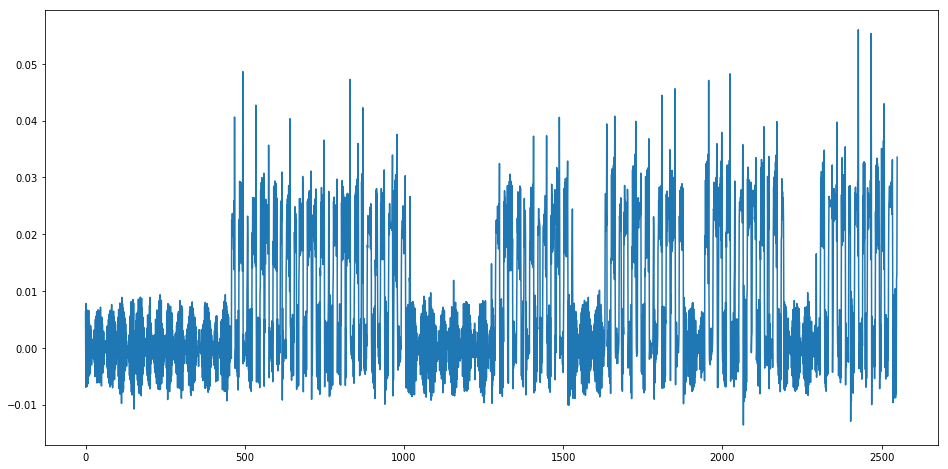

In [23]:
plt.figure(figsize=(16,8))
plt.plot(df.Ic.values)
plt.show()

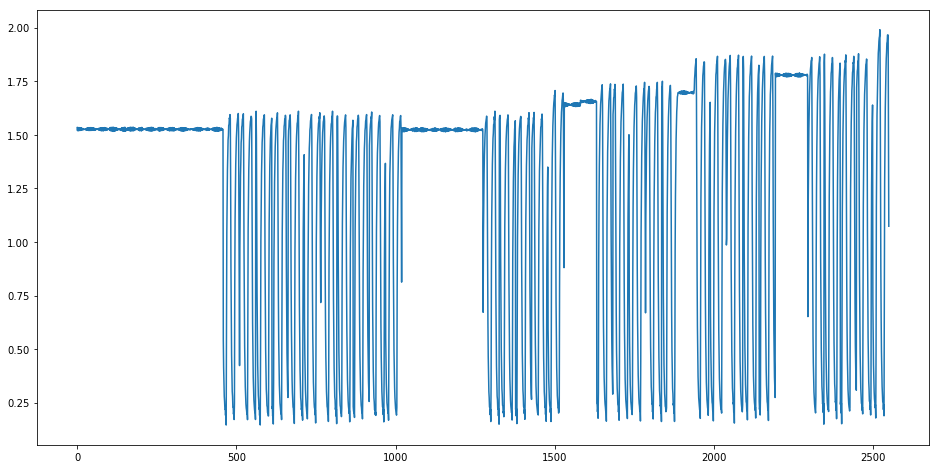

In [24]:
plt.figure(figsize=(16,8))
plt.plot(df.Uce.values)
plt.show()

In [32]:
for (_,_,files) in os.walk(dir_file):
    for file in files:
        print(file)

Voltage-Current-2019-11-18T10-44-04.tdms
Voltage-Current-2019-11-18T10-59-59.tdms
Voltage-Current-2019-11-18T11-16-06.tdms
Voltage-Current-2019-11-18T11-33-07.tdms
Voltage-Current-2019-11-18T11-50-08.tdms
Voltage-Current-2019-11-18T12-07-05.tdms
Voltage-Current-2019-11-18T12-24-04.tdms
Voltage-Current-2019-11-18T13-54-46.tdms
Voltage-Current-2019-11-18T14-24-12.tdms
Voltage-Current-2019-11-18T14-44-26.tdms
Voltage-Current-2019-11-18T15-13-03.tdms
Voltage-Current-2019-11-18T15-29-07.tdms
Voltage-Current-2019-11-18T15-41-19.tdms
Voltage-Current-2019-11-18T15-55-00.tdms
Voltage-Current-2019-11-18T16-11-08.tdms
Voltage-Current-2019-11-19T08-55-08.tdms
